In [1]:
from neurodatatypes import Session, Widefield
from sklearn.decomposition import PCA
import numpy as np
from wfield import reconstruct
import matplotlib.pyplot as plt


There are multiple opts files for this session, selecting the latest one.


C:\Users\mmelin\AppData\Local\Temp\ipykernel_26836\467549461.py:11: RuntimeWarning: Mean of empty slice
  plt.imshow(np.nanmean(out, axis=0),cmap='seismic')


(-0.5, 639.5, 539.5, -0.5)

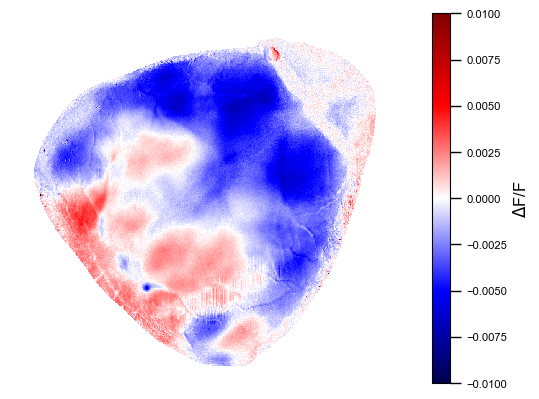

In [8]:
#%% Lets try to plot a heatmap  - without behavior realignment first
data = 'X:\Widefield'
mouse = 'mSM63'
date = '03-Jul-2018'
clims = (-.01, .01)

session = Session(data,mouse,date) # TODO: somehow grab sessions with min number of trials in each state
wf = Widefield(data,mouse,date)
out = reconstruct(wf.U, wf.Vc[:,110:180]) # this function is slow to run for a lot of frames, so do this after the analysis
plt.figure()
plt.imshow(np.nanmean(out, axis=0),cmap='seismic') 
plt.clim(clims)
plt.colorbar(label='$\Delta$F/F')
plt.axis('off')


In [4]:
wf.trialnum

388

In [ ]:
# %% Do the alignment
requested_trials = np.array([0, 1, 2, 3, 4, 5, 6, 7, 154, 300, 301, 302])  # start from zero

# need to modify Session object to also return dataframe of event times





def get_samples(zero_samples, pre_samples, post_samples):  # zero samples will depend on what trials are desired
    # convert to frames here

    return

def align_to_event(alignment_times, pre_time, post_time, fs):

    return


In [ ]:
# old code
def align_to_behavior(self, requested_trials = None):
        raise NotImplementedError('This will not be used, creating a more general alignment function')
        if requested_trials is None:
            requested_trials = self.bpod_trials
        
        n_bpod_trials = 5000 #TODO: make this SessionData.NTrials
        included = self.trials <= n_bpod_trials #Ensure there are not too many trials in Vc 
        self.trials = self.trials[included]
        self.bpod_trials = self.bpod_trials[included]
        self.Vc = self.Vc[:,:,included]
        
        num_requested = np.size(requested_trials)
        
        good_trials = requested_trials[np.isin(requested_trials,self.bpod_trials)] #returns the requested bpod trial #'s that have imaging data
        bTrials = np.where(np.isin(self.bpod_trials,requested_trials))[0] #gives us the indices to grab from Vc
        self.Vc = self.Vc[:,:,bTrials]
        n_trials = len(bTrials)
        print('''
              Requesting {} trials from {} trials in BPod session. 
              Aligning {} trials (Vc dataset sometimes has some missing trials).
              '''.format(num_requested, n_bpod_trials, n_trials))
        
        epoch_lengths = np.array([1, 0.5, 1.00, 0.4, 0.75]) # TODO: make this a function arg
        fs = self.opts['frameRate']
        epoch_frames = np.cumsum(np.floor(epoch_lengths * fs), dtype=int) #marks the frames where each epoch begins
        
        #do the actual alignment
        rejected_count = 0
        newVc = np.full([np.shape(self.Vc)[0], epoch_frames[-1], np.shape(self.Vc)[2]], np.nan)
        
        for i in range(np.shape(self.Vc)[2]): #iterate over trials
            f = 3
            aligned_frame = self._align_one_frame() #do aligning here
            
        
        del self.Vc #TODO: delete things that are unneeded now
        raise NotImplementedError()
        return alVc, bpod_trials

In [ ]:

### DO NOT CONFUSE INDEXING BETWEEN MATLAB AND PYTHON

"""
The general order should be as follows.

1. Get the desired trial #'s for performing a manipulation or analysis

2. From those trial #'s grab the time aligned imaging data.
Also return corresponding behavior data. 

(unSVD and align to allen before analysis, unshrink array as late as possible)

3. Perform desired analysis

(or unSVD and align to allen after analysis, unshrink array as late as possible)
"""